In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

In [2]:
# Load dataset
dataset = pd.read_csv('seeds.csv')
data_feature_names={'Area', 'Perimeter','Compactness','Kernel.Length' ,'Kernel.Width' ,'Asymmetry.Coeff' ,'Kernel.Groove'}
# Split-out validation dataset
array = dataset.values
X = array[:,0:7]
y = array[:,7]

#Data Preprocessing
scaler= MinMaxScaler(feature_range=(0,1))
rescaledX= scaler.fit_transform(X)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [3]:
from apyori import apriori
listdata= dataset.values.tolist()
assoData= apriori(listdata)
res=list(assoData)
res

[RelationRecord(items=frozenset({1.0}), support=0.3316582914572864, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0}), confidence=0.3316582914572864, lift=1.0)]),
 RelationRecord(items=frozenset({2.0}), support=0.3417085427135678, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({2.0}), confidence=0.3417085427135678, lift=1.0)]),
 RelationRecord(items=frozenset({3.0}), support=0.32663316582914576, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({3.0}), confidence=0.32663316582914576, lift=1.0)])]

In [4]:
# Spot Check Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.968225 (0.031913)
KNN: 0.904625 (0.061532)
CART: 0.910714 (0.070756)
NB: 0.918543 (0.027149)
SVM: 0.929415 (0.072601)


In [5]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.875
[[13  2  3]
 [ 0  9  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

         1.0       1.00      0.72      0.84        18
         2.0       0.82      1.00      0.90         9
         3.0       0.81      1.00      0.90        13

    accuracy                           0.88        40
   macro avg       0.88      0.91      0.88        40
weighted avg       0.90      0.88      0.87        40



/home/jayesh/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


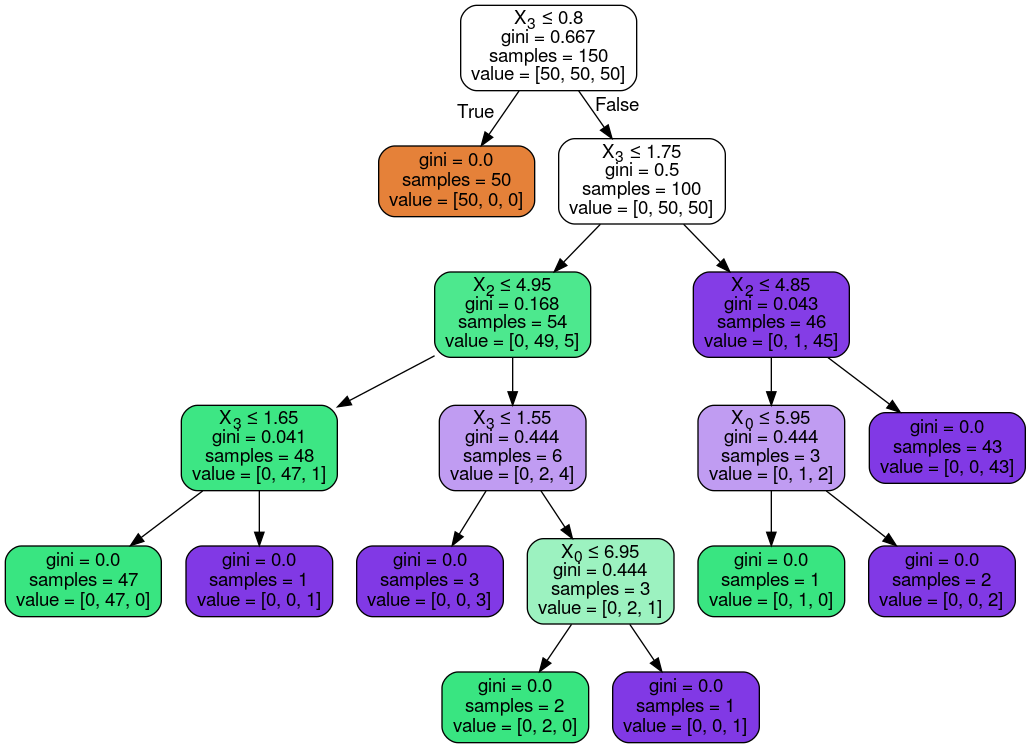

In [6]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [7]:
dataset.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


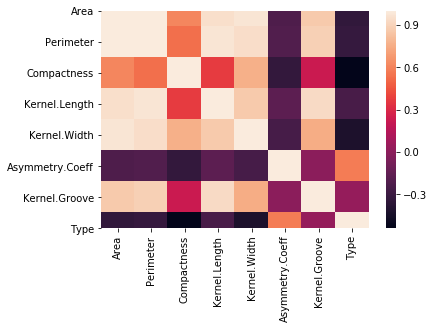

In [8]:
import seaborn as sns

sns.heatmap(dataset.corr(),fmt='d')

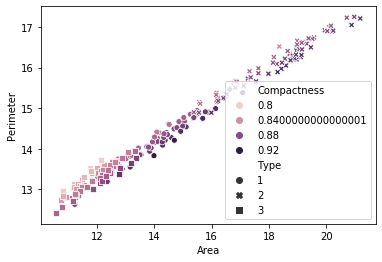

In [9]:
sns.scatterplot(dataset.Area, dataset.Perimeter,dataset.Compactness,dataset.Type)
